# Gradient Descent - Lab

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.


## Objectives

In this lab you will: 


- Implement gradient descent from scratch to minimize OLS


## Use gradient descent to minimize OLS

To practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to as Ordinary Least Squares (OLS) regression. You'll compare two simplistic models and use gradient descent to improve upon these initial models.


## Load the dataset

- Import the file `'movie_data.xlsx'` using Pandas 
- Print the first five rows of the data 

> You can use the `read_excel()` function to import an Excel file. 

In [3]:
# Import the data
import pandas as pd
df = pd.read_excel('movie_data.xlsx')

# Print the first five rows of the data
df.head(5)

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


## Two simplistic models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested and need to be compared.  
The two models are:  

$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  


Here's a graph of the two models along with the actual data:

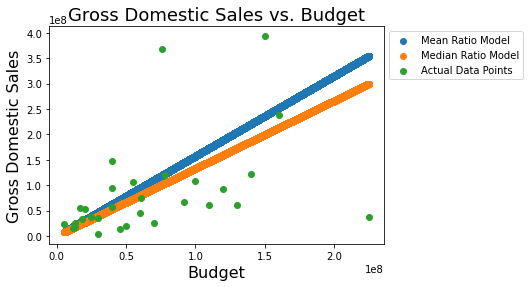

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df['budget'].min(), stop=df['budget'].max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') # Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') # Model 2
plt.scatter(df['budget'], df['domgross'], label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=18)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Error/Loss functions

To compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally, this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function `rss()` which calculates the residual sum of squares for a simplistic model: 

$\text{domgross} = m \cdot \text{budget}$ 

In [12]:
import numpy as np
def rss(m, X=df['budget'], y=df['domgross']):
    """
    Calculate the Residual Sum of Squares (RSS)
    for the model: domgross = m * budget
    """
    y_pred = m * budget
    residuals = domgross - y_pred
    rss_value = np.sum(residuals ** 2)
    return rss_value 

## Find the RSS for the two models
Which of the two models is better?

In [13]:
# Your code here

budget = df['budget']
domgross = df['domgross']

rss_model1 = rss(1, budget, domgross)
rss_model2 = rss(2, budget, domgross)

print("RSS for model 1 (m=1):", rss_model1)
print("RSS for model 2 (m=2):", rss_model2)

# Compare models
if rss_model1 < rss_model2:
    better_model = "Model 1 (m=1)"
else:
    better_model = "Model 2 (m=2)"

print("Better model:", better_model)

RSS for model 1 (m=1): 222288260290116585
RSS for model 2 (m=2): 409720103894263680
Better model: Model 1 (m=1)


In [14]:
# Determine which model is better
if rss_model1 < rss_model2:
    better_model = "Model 1 (m=1)"
else:
    better_model = "Model 2 (m=2)"

print("Better model:", better_model)

Better model: Model 1 (m=1)


In [ ]:
# Your response here
"model 1 is better since its less than model 2"
"Model 1 fits the data better than model 2.It has lower residual sum of squares"


## Gradient descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less than 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference 
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

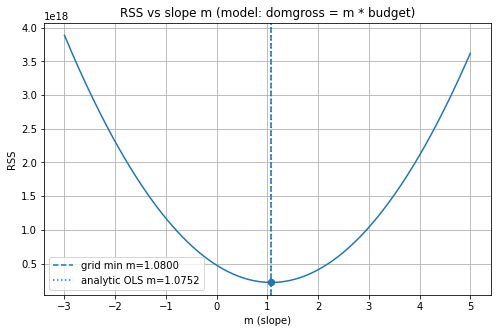

Grid search approx min: m = 1.080000, RSS = 221044441980427872.00
Analytic OLS (no intercept): m_OLS = 1.075235, RSS at m_OLS = 221039432217011104.00


In [21]:
# Your code here
import matplotlib.pyplot as plt
budget = df['budget'].values
domgross = df['domgross'].values
def rss_for_m(m, x, y):
    """Return RSS for slope m (model y_hat = m * x)."""
    y_pred = m * x
    residuals = y - y_pred
    return np.sum(residuals ** 2)

# Create m grid from -3 to 5 (inclusive)
m_values = np.linspace(-3, 5, 401)  
rss_values = np.array([rss_for_m(m, budget, domgross) for m in m_values])

# Find grid minimum
idx_min = np.argmin(rss_values)
m_min_grid = m_values[idx_min]
rss_min_grid = rss_values[idx_min]

# Analytic OLS slope for model without intercept: m_OLS = sum(x*y) / sum(x^2)
m_ols = np.sum(budget * domgross) / np.sum(budget ** 2)
rss_at_ols = rss_for_m(m_ols, budget, domgross)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(m_values, rss_values)
plt.axvline(m_min_grid, linestyle='--', label=f'grid min m={m_min_grid:.4f}')
plt.axvline(m_ols, linestyle=':', label=f'analytic OLS m={m_ols:.4f}')
plt.scatter([m_min_grid, m_ols], [rss_min_grid, rss_at_ols]) 
plt.xlabel('m (slope)')
plt.ylabel('RSS')
plt.title('RSS vs slope m (model: domgross = m * budget)')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Grid search approx min: m = {m_min_grid:.6f}, RSS = {rss_min_grid:.2f}")
print(f"Analytic OLS (no intercept): m_OLS = {m_ols:.6f}, RSS at m_OLS = {rss_at_ols:.2f}")

As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [28]:
import numpy as np

# Extract and scale data
x = df['budget'].values
y = df['domgross'].values

# Normalize (scaling to 0–1 range)
x_scaled = (x - np.mean(x)) / np.std(x)
y_scaled = (y - np.mean(y)) / np.std(y)

# Initialize parameters
cur_x = 0
alpha = 0.01          # now we can use a normal learning rate since values are small
precision = 1e-7
previous_step_size = 1
max_iters = 10000
iters = 0

# Gradient descent loop (analytical)
while previous_step_size > precision and iters < max_iters:
    gradient = (-2) * np.sum(x_scaled * (y_scaled - cur_x * x_scaled)) / len(x_scaled)
    new_x = cur_x - alpha * gradient
    previous_step_size = abs(new_x - cur_x)
    cur_x = new_x
    iters += 1

print("The local minimum occurs at", cur_x)


The local minimum occurs at 0.43822661710382005


## Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

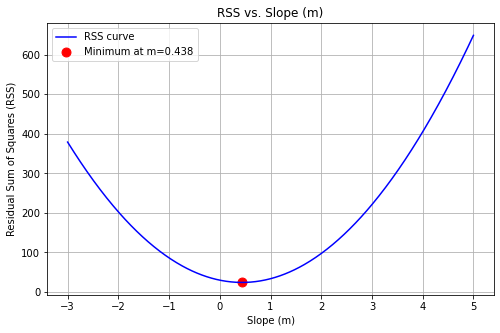

The local minimum occurs at m = 0.4382 with RSS = 24.2386


In [32]:
# Your code here
# Extract and scale data again (to match what you used for gradient descent)
x = df['budget'].values
y = df['domgross'].values
x_scaled = (x - np.mean(x)) / np.std(x)
y_scaled = (y - np.mean(y)) / np.std(y)

# Define RSS function (for scaled data)
def rss_scaled(m):
    y_pred = m * x_scaled
    residuals = y_scaled - y_pred
    return np.sum(residuals ** 2)

# Range of m values for plotting the curve
m_values = np.linspace(-3, 5, 500)
rss_values = [rss_scaled(m) for m in m_values]

# Use the m you found from gradient descent
m_min = cur_x  # from your previous gradient descent
rss_min = rss_scaled(m_min)

# Plot the RSS curve
plt.figure(figsize=(8,5))
plt.plot(m_values, rss_values, label='RSS curve', color='blue')
plt.scatter(m_min, rss_min, color='red', s=80, label=f'Minimum at m={m_min:.3f}')
plt.title('RSS vs. Slope (m)')
plt.xlabel('Slope (m)')
plt.ylabel('Residual Sum of Squares (RSS)')
plt.legend()
plt.grid(True)
plt.show()

print(f"The local minimum occurs at m = {m_min:.4f} with RSS = {rss_min:.4f}")


## Summary 

In this lab, you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!